In [328]:
# Importación de Librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats

#from sinfo import sinfo

%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.close('all')

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import decomposition

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import Image

# <div style="padding:20px;color:orange;margin:0;font-size:40px;font-family:Merriweather serif;text-align:center;display:fill;border-radius:5px;background-color:black;overflow:hidden"><b>Conjunto de datos Globales de Migrantes Desaparecidos </b></div> <div style="padding:15px;color:orange;margin:0;font-size:30px;font-family:Merriweather serif;text-align:center;display:fill;border-radius:5px;background-color:black;overflow:hidden"><b>Comprendiendo a los Migrantes Desaparecidos y Sus Trágicos Viajes </b></div> 
<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fthumbs.dreamstime.com%2Fb%2Frefugees-60289996.jpg&f=1&nofb=1&ipt=bb053e7c0f77b6e58ee8413c561b019a91b9775b6ad57a1b2481614b3e40796d&ipo=images" alt="Descripción de la imagen" width="800"></center>

#### <span style="color:orange">Este conjunto de datos proporciona un registro completo de migrantes desaparecidos y sus trágicos viajes hacia destinos internacionales, recopilado por el Proyecto Migrantes Desaparecidos, una iniciativa implementada por la Organización Internacional para las Migraciones (OIM) desde 2014. El conjunto de datos documenta muertes y desapariciones, arrojando luz sobre los desafíos que enfrentan los migrantes durante sus viajes. Tenga en cuenta que, debido a las complejidades en la recopilación de datos, las cifras presentadas probablemente sean inferiores a la realidad. El conjunto de datos sirve como un tributo a las personas que perdieron la vida, así como a las familias y comunidades afectadas por su ausencia. </span>

### <span style="color:orange">DATASET:<span> 

**Incident Type:** Tipo de incidente migratorio

**Incident Year:** Año en que ocurrió el incidente

**Reported Month:** Mes en que se reportó el incidente

**Region of Origin:** Región geográfica de donde originaron los migrantes

**Region of Incident:** Región geográfica donde ocurrió el incidente

**Country of Origin:** País de donde originaron los migrantes

**Number of Dead:** Número de migrantes fallecidos confirmados

**Minimum Estimated Number of Missing:** Recuento mínimo estimado de migrantes desaparecidos

**Total Number of Dead and Missing:** Recuento total de migrantes fallecidos y desaparecidos

**Number of Survivors:** Número de migrantes que sobrevivieron al incidente

**Number of Females:** Número de mujeres migrantes involucradas

**Number of Males:** Número de hombres migrantes involucrados

**Number of Children:** Número de niños migrantes involucrados

**Cause of Death:** Causa de muerte de los migrantes

**Migration Route:** Ruta tomada por los migrantes durante su viaje (si está disponible)

**Location of Death:** Ubicación aproximada donde ocurrió el incidente

**Information Source:** Fuente de información sobre el incidente

**Coordinates:** Coordenadas geográficas de la ubicación del incidente

**UNSD Geographical Grouping:** Agrupación geográfica según la División de Estadísticas de las Naciones Unidas

### <span style="color:orange">CONTEXTO COMERCIAL: <span> 
La Organización Internacional para las Migraciones (OIM) realiza y apoya investigaciones diseñadas para orientar y conformar las políticas y prácticas migratorias.

La producción de datos y la investigación se llevan a cabo para mejorar la provisión de los programas de la OIM y contribuir a una mayor comprensión de los procesos y patrones sobre la migración, y también de los vínculos entre la investigación migratoria y las políticas y prácticas sobre migración. La investigación también sirve para alimentar de manera directa el rol de la OIM como entidad que publica hallazgos de investigación aplicada, incluyendo las publicaciones principales de la Organización, el Informe Mundial sobre Migración, documentos publicados en la Serie Investigaciones sobre la Migración, y en los Perfiles de la OIM sobre Migración. 

### <span style="color:orange">DEFINCION DE OBJETIVO:<span> 
Poder predecir el Nro Total Fallecidos y Desaparecidos ante nuevos casos de migración que entren al modelo de ML a implementar.

### <span style="color:orange">CONTEXTO ANALITICO<span> 
Analizar un conjunto de datos tan significativo y sensible como el de migrantes desaparecidos y sus trágicos viajes puede ofrecer insights valiosos y servir para múltiples propósitos, desde la identificación de patrones y tendencias hasta la formulación de políticas que mejoren la seguridad de los migrantes. 

Posibles ejemplos:

- Análisis Descriptivo. Objetivo: Entender la distribución general y las características de los datos.

- Análisis de Tendencias Temporales. Objetivo: Identificar patrones y cambios a lo largo del tiempo.

- Análisis de Factores de Riesgo. Objetivo: Identificar factores que aumentan el riesgo de muerte o desaparición.

Este proyecto aborda una pequeña muestra de lo que se puede analizar.

In [329]:
# Iniciamos cargando el archivo a un Dataframe y mostramos las primeras 5 filas
url = 'https://raw.githubusercontent.com/johnhigers/DataAnalisisScience/main/Global%20Missing%20Migrants%20Dataset.csv'
df  = pd.read_csv(url, sep=',')
df.head(4)

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala             1.0   
1      North America           Unknown             1.0   
2      North America           Unknown             1.0   
3      North America            Mexico             1.0   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   

   Number of Survivors  Number of Females  Number of Males  \
0                    0                  0                1   
1                    0                  0                0   
2                    0                  0                0   
3                    0                  0                1   

   Number of Children    Cause of Death            Migration route  \
0                   0  Mixed or unknown  US-Mexico border crossing   
1                   0  Mixed or unknown  US-Mexico border crossing   
2                   0  Mixed or unknown  US-Mexico border crossing   
3                   0          Violence  US-Mexico border crossing   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   

  UNSD Geographical Grouping  
0           Northern America  
1           Northern America  
2           Northern America  
3           Northern America

In [330]:
# Listamos los nombres de las columnas (atributos)
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

Como los nombres de las columnas son muy largos y poco claros, vamos a dejarlos en español y abreviando lo más posible

In [331]:
# Asignar nuevos nombres en español a las columnas
nuevos_nombres = ['Tipo Incidente','Año Incidente','Mes Reportado','Región Origen','Región Incidente','País Origen','Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOBInc','Nro Mujeres','Nro Hombres','Nro Niños','Causa FA','Ruta Migratoria','Ubicación FA','Fte Información','Coordenadas','Agr Geográfica']
df.columns = nuevos_nombres
df.columns

Index(['Tipo Incidente', 'Año Incidente', 'Mes Reportado', 'Región Origen',
       'Región Incidente', 'País Origen', 'Nro FA', 'Mín Estimado DES',
       'Nro Total FAyDES', 'Nro SOBInc', 'Nro Mujeres', 'Nro Hombres',
       'Nro Niños', 'Causa FA', 'Ruta Migratoria', 'Ubicación FA',
       'Fte Información', 'Coordenadas', 'Agr Geográfica'],
      dtype='object')

In [332]:
# Mostramos las últimas 4 filas
df.tail(4)

Tipo Incidente  Año Incidente Mes Reportado       Región Origen  \
13016       Incident           2023          July  Western Africa (P)   
13017       Incident           2023          July      Western Africa   
13018       Incident           2023          July               Mixed   
13019       Incident           2023          July  Western Africa (P)   

      Región Incidente País Origen  Nro FA  Mín Estimado DES  \
13016     Western Asia     Unknown     2.0                 0   
13017  Northern Africa     Senegal    13.0                 0   
13018  Northern Africa     Unknown     6.0                 0   
13019   Western Africa     Unknown    16.0                37   

       Nro Total FAyDES  Nro SOBInc  Nro Mujeres  Nro Hombres  Nro Niños  \
13016                 2           0            0            2          0   
13017                13           6            0            0          0   
13018                 6          48            0            0          0   
13019                53           2            2            0          0   

                                                Causa FA  \
13016  Vehicle accident / death linked to hazardous t...   
13017                                           Drowning   
13018                                           Drowning   
13019                                           Drowning   

                                         Ruta Migratoria  \
13016                          Türkiye-Europe land route   
13017  Western Africa / Atlantic route to the Canary ...   
13018  Western Africa / Atlantic route to the Canary ...   
13019  Western Africa / Atlantic route to the Canary ...   

                                            Ubicación FA  \
13016  At the Kapıkule Türkiye-Bulgaria Border Gate, ...   
13017  Off the coasts of Dakhla, Western Sahara - 6 s...   
13018  Unspecified location off the coast of Nador, M...   
13019           Off the coast of Ouakam, Dakar, Senegal    

                                 Fte Información              Coordenadas  \
13016                       Son Dakika, Hurriyet   41.71697242, 26.351489   
13017  Barron's News, InfoMigrants, IOM Morrocco  23.72836078, -15.901632   
13018  El Nashra, Swiss Info; CGTN, IOM Morrocco   35.17187365, -2.903182   
13019                                IOM Senegal  14.71870705, -17.506255   

      Agr Geográfica  
13016   Western Asia  
13017  Uncategorized  
13018  Uncategorized  
13019  Uncategorized

In [333]:
# Revisamos tamaño del DataSet (filas,columnas)
df.shape

(13020, 19)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tipo Incidente    13020 non-null  object 
 1   Año Incidente     13020 non-null  int64  
 2   Mes Reportado     13020 non-null  object 
 3   Región Origen     12998 non-null  object 
 4   Región Incidente  13020 non-null  object 
 5   País Origen       13012 non-null  object 
 6   Nro FA            12470 non-null  float64
 7   Mín Estimado DES  13020 non-null  int64  
 8   Nro Total FAyDES  13020 non-null  int64  
 9   Nro SOBInc        13020 non-null  int64  
 10  Nro Mujeres       13020 non-null  int64  
 11  Nro Hombres       13020 non-null  int64  
 12  Nro Niños         13020 non-null  int64  
 13  Causa FA          13020 non-null  object 
 14  Ruta Migratoria   9999 non-null   object 
 15  Ubicación FA      13020 non-null  object 
 16  Fte Información   13012 non-null  object

### <span style="color:orange">Limpieza de datos (data cleaning) <span>

In [335]:
# Verificamos si vienen datos faltantes
df.isnull().values.any()

True

<span style="color:yellow">Manejo de Datos Faltantes: Imputación o eliminación de valores perdidos.</span>

In [336]:
# Determinamos cantidad de datos faltantes por cada atributo
df.isnull().sum()

Tipo Incidente         0
Año Incidente          0
Mes Reportado          0
Región Origen         22
Región Incidente       0
País Origen            8
Nro FA               550
Mín Estimado DES       0
Nro Total FAyDES       0
Nro SOBInc             0
Nro Mujeres            0
Nro Hombres            0
Nro Niños              0
Causa FA               0
Ruta Migratoria     3021
Ubicación FA           0
Fte Información        8
Coordenadas           36
Agr Geográfica         1
dtype: int64

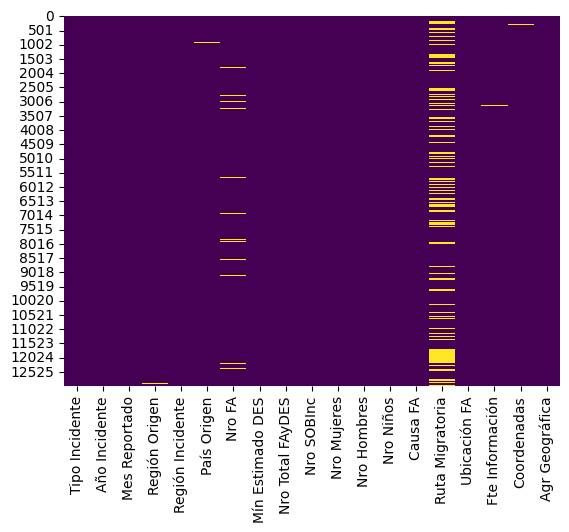

In [337]:
# Visualizamos la distribución de datos faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [338]:
# Nro Total de Filas
df.shape[0]

13020

In [339]:
# Determinamos Cantidad de valores faltantes por cada atributo y su porcentaje respecto al total de filas
dfNaN = pd.DataFrame({'NroFilasNull' : df.isnull().sum(), 'PorcentajeTotalFilas' : ((df.isnull().sum()) / (len(df)) * (100)).round(2) }) 
dfNaN[dfNaN["NroFilasNull"]>=1].sort_values(by=["NroFilasNull"], ascending=[False])

NroFilasNull  PorcentajeTotalFilas
Ruta Migratoria          3021                 23.20
Nro FA                    550                  4.22
Coordenadas                36                  0.28
Región Origen              22                  0.17
País Origen                 8                  0.06
Fte Información             8                  0.06
Agr Geográfica              1                  0.01

In [340]:
# Eliminamos Atributo que supera el 18% de datos faltantes
df = df.drop("Ruta Migratoria", axis=1)  # Elimina columna 
# Ahora nos queda 18 columnas después de eliminar
df.shape

(13020, 18)

<span style="color:yellow">
Dado que los datos faltantes que quedan son pocos (menos del 5% por columna), se opta por: Imputación de datos faltantes

Ventajas:
- Preserva todas las observaciones.
- Reduce el sesgo introducido por datos faltantes.</span>

In [341]:
# Asignamos valores por defecto para llenar los datos faltantes
df['Región Origen']  = df['Región Origen'].fillna('Unknown')
df['Nro FA']    = df['Nro FA'].fillna(0)
df['País Origen'] = df['País Origen'].fillna('Unknown')
df['Fte Información']   = df['Fte Información'].fillna('Unknown')
df['Coordenadas']   = df['Coordenadas'].fillna('00.0000,00.0000')
df['Agr Geográfica']   = df['Agr Geográfica'].fillna('Unknown')

In [342]:
# Veamos si quedan datos faltantes
df.isnull().values.any()

False

<span style="color:yellow">Corrección de Errores: Rectificación de datos incorrectos o inconsistentes.</span>

In [343]:
df.describe().T.style.set_properties(**{'background-color': 'black','color': 'white','border-color': 'grey'}).format(precision=2)

<span style="color:yellow">Se observa que hay valores minimos negativos en campos: "Mín Estimado DES" y en "Nro SOBInc". Filtramos por estos casos donde hay negativos</span>

In [344]:
df[(df["Mín Estimado DES"] < 0) | (df["Nro SOBInc"] < 0) ]

Tipo Incidente  Año Incidente Mes Reportado  \
601    Cumulative Incident           2015        August   
806         Split Incident           2015       October   
858         Split Incident           2015       October   
1247        Split Incident           2016      February   
7794              Incident           2020     September   
7796              Incident           2020     September   
7800              Incident           2020     September   
7889              Incident           2020       October   
10422             Incident           2022         March   

                     Región Origen    Región Incidente  \
601                Central America     Central America   
806                   Western Asia       Mediterranean   
858    Western / Southern Asia (P)       Mediterranean   
1247        Sub-Saharan Africa (P)     Northern Africa   
7794                 Southern Asia  South-eastern Asia   
7796                 Southern Asia  South-eastern Asia   
7800                 Southern Asia  South-eastern Asia   
7889        Sub-Saharan Africa (P)     Northern Africa   
10422                      Unknown       Mediterranean   

                                    País Origen  Nro FA  Mín Estimado DES  \
601                                     Unknown    20.0                -1   
806    Afghanistan,Syrian Arab Republic,Unknown    15.0                -2   
858                                     Unknown    57.0                -1   
1247                                    Unknown     1.0                56   
7794                                    Myanmar     1.0                 0   
7796                                    Myanmar     1.0                 0   
7800                                    Myanmar     1.0                 0   
7889                                    Unknown     2.0                 0   
10422                             Egypt,Unknown     2.0                -1   

       Nro Total FAyDES  Nro SOBInc  Nro Mujeres  Nro Hombres  Nro Niños  \
601                  19           1            0            1          1   
806                  13           0            6            3          6   
858                  56         274            7           17         20   
1247                 57          -1            0            1          0   
7794                  1          -1            1            0          0   
7796                  1          -1            0            1          0   
7800                  1          -1            1            0          0   
7889                  2          -2            0            2          0   
10422                 1           0            0            2          0   

                                                Causa FA  \
601                                     Mixed or unknown   
806                            Drowning,Mixed or unknown   
858                                             Drowning   
1247   Drowning,Harsh environmental conditions / lack...   
7794    Sickness / lack of access to adequate healthcare   
7796    Sickness / lack of access to adequate healthcare   
7800    Sickness / lack of access to adequate healthcare   
7889   Harsh environmental conditions / lack of adequ...   
10422                                           Drowning   

                                            Ubicación FA  \
601                              State of Puebla, Mexico   
806    Found on the coast of Lesvos,Off the coast of ...   
858    Found on beaches in Lesvos,north of Lesvos, Gr...   
1247   Between Dakhla, Western Sahara and Gran Canari...   
7794   In Lhoksemawe hospital, Aceh province, Indones...   
7796   In Lhoksemawe hospital, Aceh province, Indones...   
7800   In Lhoksemawe hospital, Aceh province, Indones...   
7889   In a hospital in Las Palmas, Spain - Rescued t...   
10422       Remains washed ashore at Surman beach, Libya   

                                    Fte Información              Coordenadas  \
601                       

<span style="color:yellow">Generamos una lista que tendrá el indice de filas con valores negativos a corregir<span>

In [345]:
listIndex = df.index[ (df["Mín Estimado DES"] < 0) | (df["Nro SOBInc"] < 0)].tolist()
listIndex

[601, 806, 858, 1247, 7794, 7796, 7800, 7889, 10422]

<span style="color:yellow">Probamos filtrando uno de los campos a corregir para 2 filas afectadas (identificados por su indice)<span>

In [346]:
df[ ["Mín Estimado DES"] ].loc[[601, 806]]

Mín Estimado DES
601                -1
806                -2

<span style="color:yellow">Los valores de las 2 columnas con valores negativos los reemplazamos con 0, en caso contrario se mantiene el valor.<span>

In [347]:
df["Mín Estimado DES"] = np.where( (df["Mín Estimado DES"] < 0), 0, df["Mín Estimado DES"] )
df["Nro SOBInc"] = np.where( (df["Nro SOBInc"] < 0), 0, df["Nro SOBInc"] )

# Revisamos columnas actualizadas x filas filtradas por lista de indices definida anteriormente
df[ ["Mín Estimado DES","Nro SOBInc"] ].loc[listIndex]

Mín Estimado DES  Nro SOBInc
601                   0           1
806                   0           0
858                   0         274
1247                 56           0
7794                  0           0
7796                  0           0
7800                  0           0
7889                  0           0
10422                 0           0

In [348]:
# Ahora ya no hay valores negativos como mínimos
df.describe().T.style.set_properties(**{'background-color': 'Black','color': 'white','border-color': 'grey'}).format(precision=2)

<span style="color:yellow">Deduplicación: Eliminación de registros duplicados para asegurar que cada entrada sea única.</span>

Importancia de la Deduplicación

- Mejora la Calidad de los Datos: Garantiza que cada registro sea único y relevante.

- Reduce el Sesgo: Evita que las duplicaciones influyan en los resultados del análisis.

- Optimiza el Rendimiento: Minimiza el almacenamiento y el tiempo de procesamiento necesario.

In [349]:
# Contamos filas duplicadas
df[df.duplicated(keep='first')].shape[0]

641

In [350]:
# Mostramos algunas filas duplicadas
df[df.duplicated(keep='first')].head(6)

Tipo Incidente  Año Incidente Mes Reportado  \
222       Incident           2014       October   
223       Incident           2014       October   
224       Incident           2014       October   
263       Incident           2014          June   
270       Incident           2014       October   
271       Incident           2014       October   

                     Región Origen Región Incidente País Origen  Nro FA  \
222                 Eastern Africa   Eastern Africa     Unknown     1.0   
223                 Eastern Africa   Eastern Africa     Unknown     1.0   
224                 Eastern Africa   Eastern Africa     Unknown     1.0   
263  Latin America / Caribbean (P)    North America     Unknown     1.0   
270  Latin America / Caribbean (P)    North America     Unknown     1.0   
271  Latin America / Caribbean (P)    North America     Unknown     1.0   

     Mín Estimado DES  Nro Total FAyDES  Nro SOBInc  Nro Mujeres  Nro Hombres  \
222                 0                 1           0            0            1   
223                 0                 1           0            0            1   
224                 0                 1           0            0            1   
263                 0                 1           0            0            1   
270                 0                 1           0            0            1   
271                 0                 1           0            0            1   

     Nro Niños          Causa FA  \
222          0          Drowning   
223          0          Drowning   
224          0          Drowning   
263          0  Mixed or unknown   
270          0  Mixed or unknown   
271          0  Mixed or unknown   

                                          Ubicación FA  \
222               Between Bosaso and Yemen (Bin Sinaa)   
223               Between Bosaso and Yemen (Bin Sinaa)   
224               Between Bosaso and Yemen (Bin Sinaa)   
263  Pima Country Office of the Medical Examiner ju...   
270  Pima Country Office of the Medical Examiner ju...   
271  Pima Country Office of the Medical Examiner ju...   

                                       Fte Información      Coordenadas  \
222                                                SHS      12.5331, 48   
223                                                SHS      12.5331, 48   
224                                                SHS      12.5331, 48   
263  Pima County Office of the Medical Examiner (PC...  00.0000,00.0000   
270  Pima County Office of the Medical Examiner (PC...  00.0000,00.0000   
271  Pima County Office of the Medical Examiner (PC...  00.0000,00.0000   

       Agr Geográfica  
222     Uncategorized  
223     Uncategorized  
224     Uncategorized  
263  Northern America  
270  Northern America  
271  Northern America

In [351]:
# Borramos filas duplicadas y contamos cuantas quedaron
df.drop_duplicates(keep='first', inplace=True)
len(df)

12379

In [352]:
# Antes de continuar respaldamos el Dataframe obtenido hasta acá. Sin valores negativos y sin filas duplicadas
# Esto por si se requiere volver a utilizar más adelante.
#df = df_bkp1 

df_bkp1 = df


### <span style="color:orange">Selección de Características I (feature selection)<span>


In [353]:
# Revisamos Frecuencia de datos Categoricos
df.describe(include = 'object').T

count unique  \
Tipo Incidente    12379      4   
Mes Reportado     12379     12   
Región Origen     12379     33   
Región Incidente  12379     16   
País Origen       12379    335   
Causa FA          12379     15   
Ubicación FA      12379   7460   
Fte Información   12379   3804   
Coordenadas       12379   9583   
Agr Geográfica    12379     20   

                                                                top   freq  
Tipo Incidente                                             Incident  12029  
Mes Reportado                                                  June   1235  
Región Origen                         Latin America / Caribbean (P)   2117  
Región Incidente                                      North America   2673  
País Origen                                                 Unknown   7042  
Causa FA                                                   Drowning   3293  
Ubicación FA      Pima Country Office of the Medical Examiner ju...   1036  
Fte Información   Pima County Office of the Medical Examiner (PC...   1452  
Coordenadas                                35.68940913, 51.38958967     31  
Agr Geográfica                                     Northern America   2675

In [354]:
# Revisamos cardinalidad de variable : Tipo Incidente
df['Tipo Incidente'].value_counts(sort=True)  

Tipo Incidente
Incident                   12029
Split Incident               261
Cumulative Incident           84
Incident,Split Incident        5
Name: count, dtype: int64

In [355]:
# Mapeamos Tipo Incidente ..
df['Tipo Incidente'] = df['Tipo Incidente'].map({'Incident': 1, 'Split Incident': 2, 'Cumulative Incident': 3, 'Incident,Split Incident': 5 })

# Revisamos cardinalidad de variable mapeada: Tipo Incidente
df['Tipo Incidente'].value_counts(sort=True)  

Tipo Incidente
1    12029
2      261
3       84
5        5
Name: count, dtype: int64

In [356]:
# Revisamos cardinalidad de variable : Mes Reportado
df['Mes Reportado'].value_counts(sort=True)  

Mes Reportado
June         1235
September    1155
July         1146
October      1141
August       1105
November      993
May           978
January       973
December      967
April         930
March         911
February      845
Name: count, dtype: int64

In [357]:
# Mapeamos Mes Reportado
df['Mes Reportado'] = df['Mes Reportado'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May':5, 'June':6, 
                                               'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
# Revisamos cardinalidad de variable mapeada: Mes Reportado
df['Mes Reportado'].value_counts(sort=True)

Mes Reportado
6     1235
9     1155
7     1146
10    1141
8     1105
11     993
5      978
1      973
12     967
4      930
3      911
2      845
Name: count, dtype: int64

In [358]:
# Ahora las columnas mapeadas son numéricas
df.dtypes

Tipo Incidente        int64
Año Incidente         int64
Mes Reportado         int64
Región Origen        object
Región Incidente     object
País Origen          object
Nro FA              float64
Mín Estimado DES      int64
Nro Total FAyDES      int64
Nro SOBInc            int64
Nro Mujeres           int64
Nro Hombres           int64
Nro Niños             int64
Causa FA             object
Ubicación FA         object
Fte Información      object
Coordenadas          object
Agr Geográfica       object
dtype: object

### <span style="color:orange">Transformación de Datos<span>

<span style="color:yellow">Conversión de Tipos de Datos: Cambiar el tipo de datos de las variables para adecuarlas a los requisitos del análisis.<span>

Importancia de la Conversión de Tipos de Datos:

- Compatibilidad: Asegura que los datos sean compatibles con las funciones y métodos utilizados en el análisis y modelado.

- Eficiencia: Optimiza el uso de memoria y mejora la velocidad de procesamiento.

- Exactitud: Previene errores y asegura que las operaciones se realicen correctamente sobre los tipos de datos adecuados.

Transformar columnas de tipo object a category en un DataFrame de pandas tiene varios beneficios:

Reducción significativa del uso de memoria.
Mejora en el rendimiento de las operaciones.
Gestión más eficiente de las variables categóricas, incluyendo ordenación y comparaciones.
Preparación más fácil y eficaz para análisis y modelado de machine learning.
Esta transformación es especialmente recomendable cuando se trabaja con grandes conjuntos de datos que contienen muchas variables categóricas con un número limitado de categorías únicas.

In [359]:
# Transformamos columnas object a category
columnas_object = df.select_dtypes(include=['object']).columns
print("Transforma columnas object..")
for i, colum in enumerate(columnas_object):				
    print(colum)
    df[colum] = df[colum].astype('category')

Transforma columnas object..
Región Origen
Región Incidente
País Origen
Causa FA
Ubicación FA
Fte Información
Coordenadas
Agr Geográfica


In [360]:
df.dtypes

Tipo Incidente         int64
Año Incidente          int64
Mes Reportado          int64
Región Origen       category
Región Incidente    category
País Origen         category
Nro FA               float64
Mín Estimado DES       int64
Nro Total FAyDES       int64
Nro SOBInc             int64
Nro Mujeres            int64
Nro Hombres            int64
Nro Niños              int64
Causa FA            category
Ubicación FA        category
Fte Información     category
Coordenadas         category
Agr Geográfica      category
dtype: object

In [361]:
# Revisamos estadística de "Nro FA"
df['Nro FA'].describe()

count    12379.000000
mean         2.581469
std          9.766322
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        750.000000
Name: Nro FA, dtype: float64

Vemos que la variable: "Nro FA" es del tipo float64, vamos a cambiar el tipo de dato a int64 ya que es más óptimo:
- Las variables de tipo int64 ocupan menos memoria que las de tipo float64.
- Algunos algoritmos de machine learning pueden requerir o preferir datos en formato entero en lugar de flotante, especialmente si los valores representan categorías discretas o conteos en lugar de medidas continuas.


In [362]:
# Cambiamos el tipo de dato de float64 a int64 para 'Nro FA'
df["Nro FA"] = df["Nro FA"].astype('int64')

In [363]:
# Revisamos como queda finalmente
df.dtypes

Tipo Incidente         int64
Año Incidente          int64
Mes Reportado          int64
Región Origen       category
Región Incidente    category
País Origen         category
Nro FA                 int64
Mín Estimado DES       int64
Nro Total FAyDES       int64
Nro SOBInc             int64
Nro Mujeres            int64
Nro Hombres            int64
Nro Niños              int64
Causa FA            category
Ubicación FA        category
Fte Información     category
Coordenadas         category
Agr Geográfica      category
dtype: object

In [364]:
# Revisamos estadística de "Nro FA" y mantiene la presicion
df['Nro FA'].describe()

count    12379.000000
mean         2.581469
std          9.766322
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        750.000000
Name: Nro FA, dtype: float64

### <span style="color:orange">Gráficos de Variables Categóricas<span>

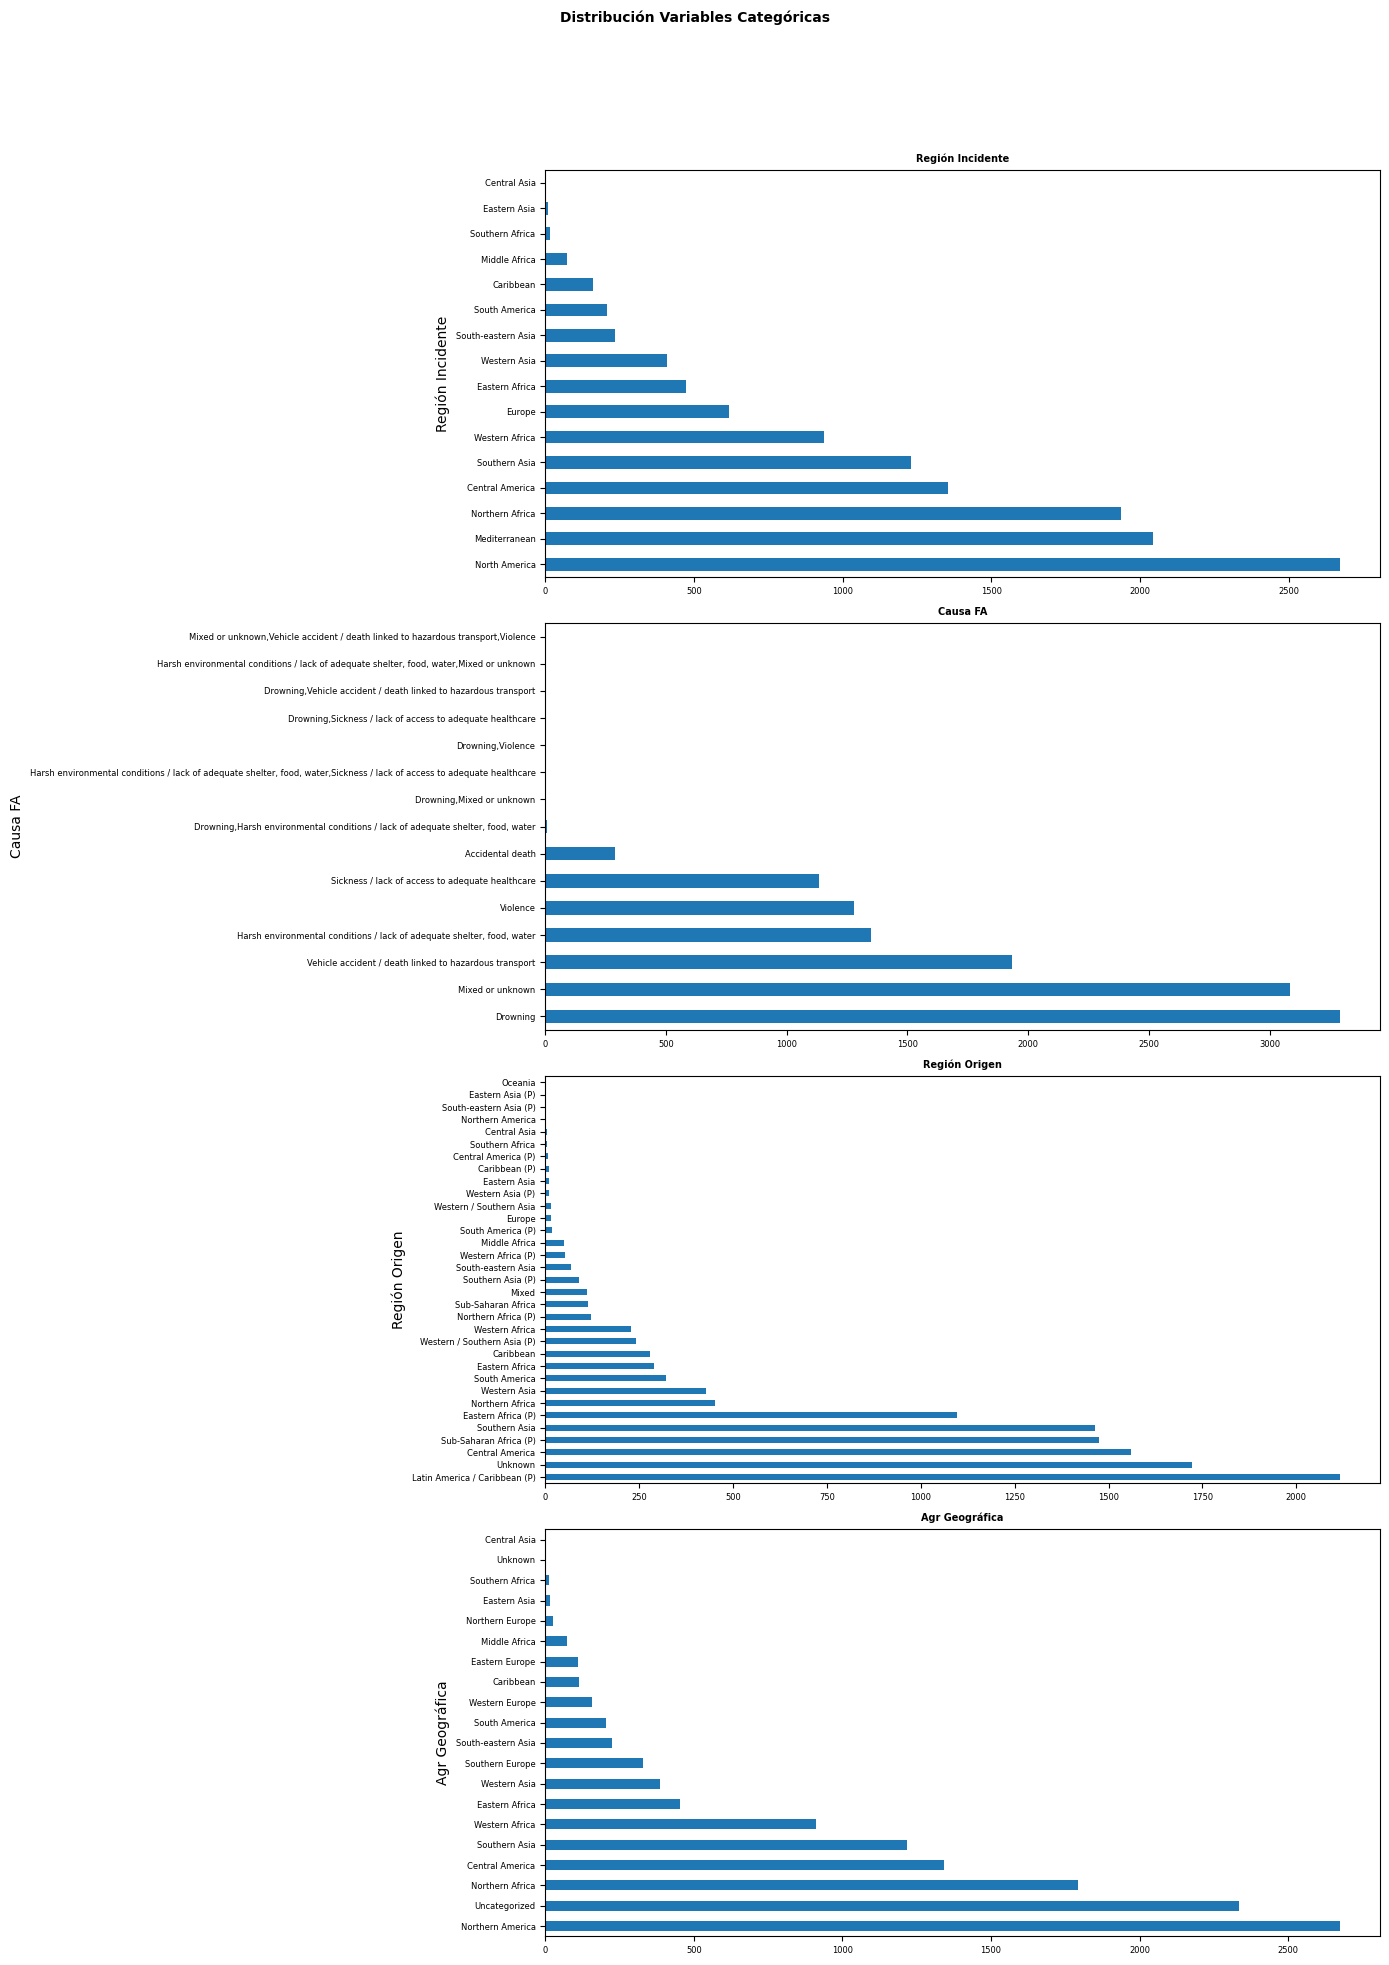

In [365]:
# Gráfico para cuatro variables Categóricas
# ==============================================================================
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))
axes = axes.flat
columnas_object = ['Región Incidente', 'Causa FA','Región Origen','Agr Geográfica']
       
for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

    

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución Variables Categóricas',  fontsize = 10, fontweight = "bold");

In [366]:
# Revisamos estadística de datos numéricos
df.describe(include = 'int64').T.style.format(precision=2)

In [367]:
df.shape

(12379, 18)

#### Análisis de variables numéricas

### <span style="color:orange">Detección y Tratamiento de valores atípicos (outliers)<span>

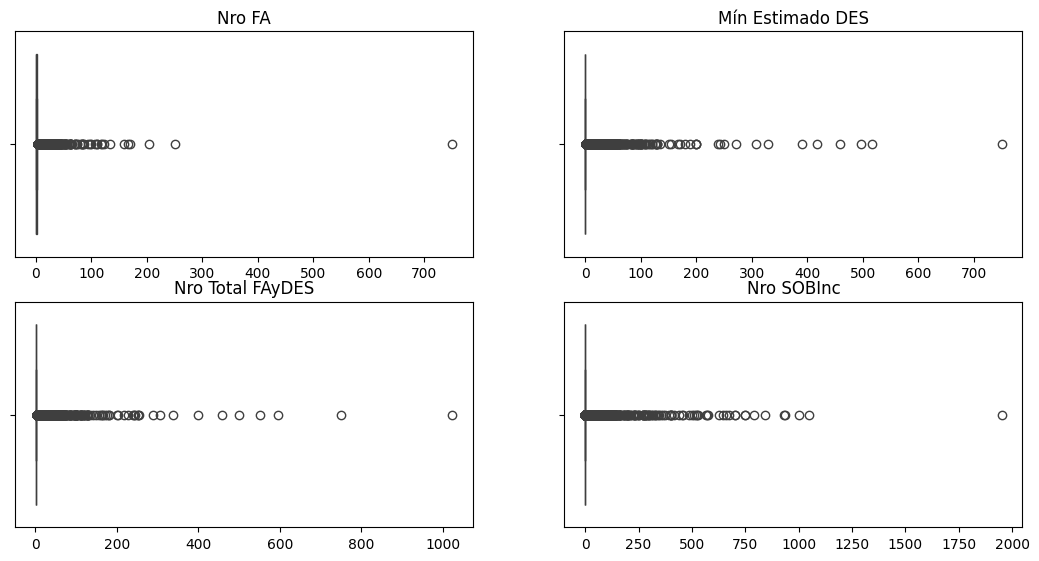

In [368]:
# Funcion que grafica Outliers de columnas numéricas
def Fun_OutliersNumeric(df_name):
    plt.figure(figsize=(13,24))
    for i,j in zip(range(14),['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOBInc']):
        plt.subplot(7,2,i+1)
        sns.boxplot(x=df_name[j],orient='v')
        plt.title(j)
        plt.xlabel('')


# Invocamos la funcion pasando el dataframe: df
Fun_OutliersNumeric(df)

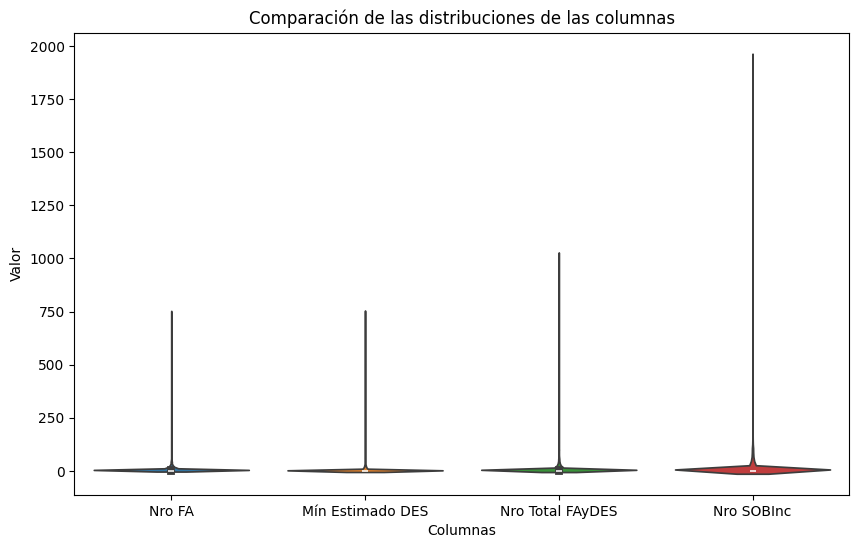

In [369]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de violín para comparar las distribuciones
sns.violinplot(data=df[['Nro FA', 'Mín Estimado DES', 'Nro Total FAyDES', 'Nro SOBInc']])

# Configuración de etiquetas
plt.title("Comparación de las distribuciones de las columnas")
plt.ylabel('Valor')
plt.xlabel('Columnas')

# Mostrar gráfico
plt.show()

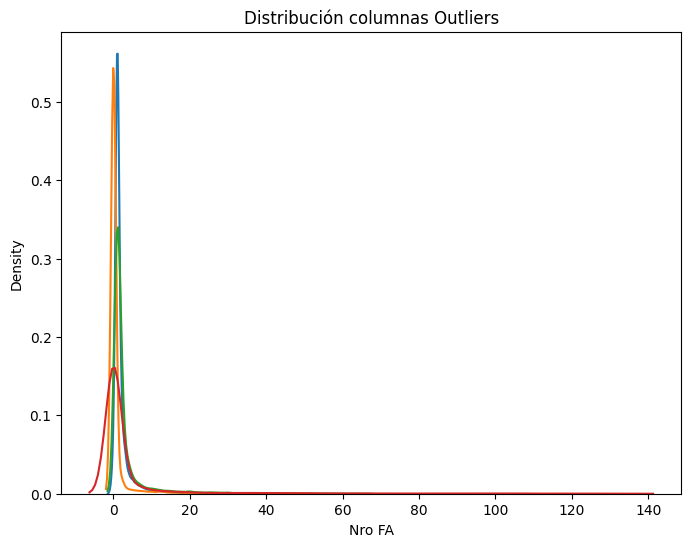

In [417]:
def Fun_DistOutliers(df_name):
    fig, ax1 = plt.subplots(ncols=1, figsize=(8, 6))
    ax1.set_title('Distribución columnas Outliers')
    sns.kdeplot(df['Nro FA'], ax=ax1)
    sns.kdeplot(df['Mín Estimado DES'], ax=ax1)
    sns.kdeplot(df['Nro Total FAyDES'], ax=ax1)
    sns.kdeplot(df['Nro SOBInc'], ax=ax1)

Fun_DistOutliers(df)

#### Evaluamos porcentaje de Outliers sobre el 75% para cada columna a evaluar. Si representan menos del 5% se podría eliminar estos valores. 

In [371]:
# Para cada columna numérica en el DataFrame
percent_outliers_above_75 = {}

for column in ['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOBInc']:
    # Calcular Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir el límite superior para outliers comunes (más allá del 75%)
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los outliers por encima del límite superior
    outliers_column = df[df[column] > upper_bound]
    
    # Contar los outliers y calcular el porcentaje sobre el total
    num_outliers_above_75 = outliers_column.shape[0]
    total_elements = df[column].shape[0]
    percent_outliers_above_75[column] = f"{(num_outliers_above_75 / total_elements) * 100:.2f}%"

# Mostrar el porcentaje de outliers por encima del 75% en cada columna
print("%Outliers sobre el 75%..")
for column, percent in percent_outliers_above_75.items():
    print(f"{column} : {percent}")

%Outliers sobre el 75%..
Nro FA : 11.78%
Mín Estimado DES : 10.03%
Nro Total FAyDES : 16.67%
Nro SOBInc : 16.61%


Los % de valores Extremos son muy altos, se va a preferir mantener estos valores sin reemplazar por la media, mediana o moda. Si los valores extremos son consistentes con el dominio del problema (por ejemplo, si no son errores de medición), puede ser importante conservarlos para el análisis.

##### <span style="color:white"> ¿Qué tan representativa es la Media de estas variables?<span>

In [372]:
# Listamos la media de variables numéricas
df.select_dtypes(include='number').mean().round(2)

Tipo Incidente         1.04
Año Incidente       2019.02
Mes Reportado          6.67
Nro FA                 2.58
Mín Estimado DES       2.00
Nro Total FAyDES       4.58
Nro SOBInc             6.89
Nro Mujeres            0.48
Nro Hombres            1.13
Nro Niños              0.25
dtype: float64

In [373]:
# Creamos un DataFrame con el Coeficiente de Variación de variables numéricas
df_cv= df.select_dtypes(include='number').agg(lambda x: x.std() / x.mean(skipna=True) ).rename('Coeficiente_Variación').round(2).reset_index()
df_cv.rename(columns={'index': 'Nom_Variable'}, inplace=True)
df_cv


Nom_Variable  Coeficiente_Variación
0    Tipo Incidente                   0.22
1     Año Incidente                   0.00
2     Mes Reportado                   0.50
3            Nro FA                   3.78
4  Mín Estimado DES                   8.02
5  Nro Total FAyDES                   4.46
6        Nro SOBInc                   6.29
7       Nro Mujeres                   6.11
8       Nro Hombres                   3.46
9         Nro Niños                   9.96

In [374]:
# Creamos un DataFrame con la Media de variables numéricas
df_media = df.select_dtypes(include='number').agg(lambda x: x.mean(skipna=True) ).rename('Media').round(2).reset_index()
df_media.rename(columns={'index': 'Nom_Variable'}, inplace=True)
df_media

Nom_Variable    Media
0    Tipo Incidente     1.04
1     Año Incidente  2019.02
2     Mes Reportado     6.67
3            Nro FA     2.58
4  Mín Estimado DES     2.00
5  Nro Total FAyDES     4.58
6        Nro SOBInc     6.89
7       Nro Mujeres     0.48
8       Nro Hombres     1.13
9         Nro Niños     0.25

In [375]:
# Unimos ambos DataFrame por columna : Nom_Variable
df_merged = pd.merge(df_cv, df_media, on='Nom_Variable', how='inner') 
df_merged


Nom_Variable  Coeficiente_Variación    Media
0    Tipo Incidente                   0.22     1.04
1     Año Incidente                   0.00  2019.02
2     Mes Reportado                   0.50     6.67
3            Nro FA                   3.78     2.58
4  Mín Estimado DES                   8.02     2.00
5  Nro Total FAyDES                   4.46     4.58
6        Nro SOBInc                   6.29     6.89
7       Nro Mujeres                   6.11     0.48
8       Nro Hombres                   3.46     1.13
9         Nro Niños                   9.96     0.25

##### <span style="color:white">Como el Coeficiente de Variación <= 30% se concluye que la data es homogenea, por tanto, la Media es altamente representativa de los datos. Así que, vamos a usar la media para bajar los valores extremos<span>

In [376]:
outliers_indices = []
for column in ['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOBInc']:
        print(column)
        z_scores = stats.zscore(df[column])
        outliers_indices.extend(df.index[abs(z_scores) > 3])
        print (df[ [column] ].loc[outliers_indices])

        media = np.mean(df[column])
        df.loc[outliers_indices, column] = media
        print (df[ [column] ].loc[outliers_indices])

Nro FA
       Nro FA
45        251
78         44
94         62
127        45
173       170
...       ...
12550      86
12592      34
12708      50
12790      40
12849      80

[96 rows x 1 columns]
         Nro FA
45     2.581469
78     2.581469
94     2.581469
127    2.581469
173    2.581469
...         ...
12550  2.581469
12592  2.581469
12708  2.581469
12790  2.581469
12849  2.581469

[96 rows x 1 columns]
Mín Estimado DES
       Mín Estimado DES
45                    0
78                   33
94                    0
127                   0
173                  81
...                 ...
10826                70
12454               180
12532                61
12849               516
12886                51

[204 rows x 1 columns]
       Mín Estimado DES
45             2.000646
78             2.000646
94             2.000646
127            2.000646
173            2.000646
...                 ...
10826          2.000646
12454          2.000646
12532          2.000646
12849          2.0

In [377]:
df.dtypes

Tipo Incidente         int64
Año Incidente          int64
Mes Reportado          int64
Región Origen       category
Región Incidente    category
País Origen         category
Nro FA               float64
Mín Estimado DES     float64
Nro Total FAyDES     float64
Nro SOBInc           float64
Nro Mujeres            int64
Nro Hombres            int64
Nro Niños              int64
Causa FA            category
Ubicación FA        category
Fte Información     category
Coordenadas         category
Agr Geográfica      category
dtype: object

In [378]:
# Transformamos columnas object a category
columnas_number = df.select_dtypes(include=['float64']).columns
print("Transforma columnas int64..")
for i, colum in enumerate(columnas_number):				
    print(colum)
    df[colum] = df[colum].astype('int64')

Transforma columnas int64..
Nro FA
Mín Estimado DES
Nro Total FAyDES
Nro SOBInc


In [379]:
df.dtypes

Tipo Incidente         int64
Año Incidente          int64
Mes Reportado          int64
Región Origen       category
Región Incidente    category
País Origen         category
Nro FA                 int64
Mín Estimado DES       int64
Nro Total FAyDES       int64
Nro SOBInc             int64
Nro Mujeres            int64
Nro Hombres            int64
Nro Niños              int64
Causa FA            category
Ubicación FA        category
Fte Información     category
Coordenadas         category
Agr Geográfica      category
dtype: object

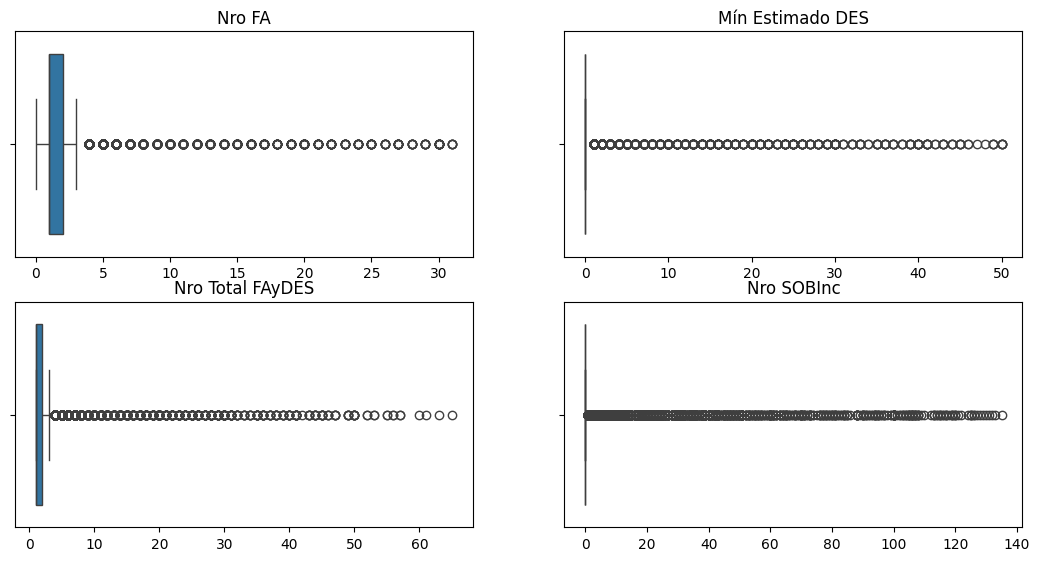

In [380]:
# Volvermos a revisar Outliers de variables numéricas
Fun_OutliersNumeric(df)

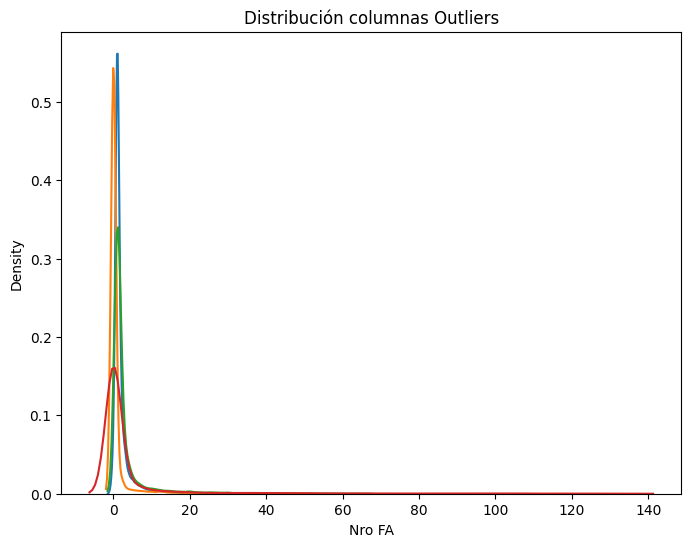

In [418]:
Fun_DistOutliers(df)

#### Se aprecia que siguen habiendo distribución a la izquierda pero bajó el rango de valores extremos

#### <span style="color:orange">Pregunta 1 : ¿Cuál es la principal Causa de Muerte por cada Agrupación Geográfica? <span>

In [382]:
# Para responder esto primero revisamos la frecuencia de columna: Causa FA 
df['Causa FA'].value_counts(sort=True)  

Causa FA
Drowning                                                                                                                   3293
Mixed or unknown                                                                                                           3083
Vehicle accident / death linked to hazardous transport                                                                     1934
Harsh environmental conditions / lack of adequate shelter, food, water                                                     1350
Violence                                                                                                                   1277
Sickness / lack of access to adequate healthcare                                                                           1132
Accidental death                                                                                                            289
Drowning,Harsh environmental conditions / lack of adequate shelter, food, water                

In [383]:
# Revisamos la frecuencia de columna: Agrupación Geográfica
df['Agr Geográfica'].value_counts(sort=True)  

Agr Geográfica
Northern America      2675
Uncategorized         2335
Northern Africa       1794
Central America       1342
Southern Asia         1218
Western Africa         910
Eastern Africa         455
Western Asia           385
Southern Europe        329
South-eastern Asia     224
South America          206
Western Europe         156
Caribbean              113
Eastern Europe         109
Middle Africa           74
Northern Europe         25
Eastern Asia            15
Southern Africa         12
Unknown                  1
Central Asia             1
Name: count, dtype: int64

In [384]:
# Calcular las frecuencias
frecuencias = df.groupby(['Agr Geográfica', 'Causa FA'], observed=True).size().reset_index(name='Frecuencia')


# Encontrar la causa más frecuente por agrupación geográfica
max_frecuencias = frecuencias.loc[frecuencias.groupby('Agr Geográfica', observed=True)['Frecuencia'].idxmax()]

# Ordenar por frecuencia de mayor a menor
max_frecuencias = max_frecuencias.sort_values(by='Frecuencia', ascending=False)
max_frecuencias

Agr Geográfica                                           Causa FA  \
101       Uncategorized                                           Drowning   
54     Northern America                                   Mixed or unknown   
47      Northern Africa                                   Mixed or unknown   
6       Central America                                           Drowning   
91        Southern Asia  Vehicle accident / death linked to hazardous t...   
116      Western Africa   Sickness / lack of access to adequate healthcare   
125        Western Asia                                           Violence   
98      Southern Europe  Vehicle accident / death linked to hazardous t...   
131      Western Europe  Vehicle accident / death linked to hazardous t...   
18       Eastern Africa                                   Mixed or unknown   
0             Caribbean                                           Drowning   
75   South-eastern Asia                                   Mixed or unknown   
71        South America                                           Violence   
30       Eastern Europe  Harsh environmental conditions / lack of adequ...   
40        Middle Africa  Vehicle accident / death linked to hazardous t...   
62      Northern Europe  Vehicle accident / death linked to hazardous t...   
23         Eastern Asia                                           Drowning   
79      Southern Africa                                   Accidental death   
111             Unknown                                   Mixed or unknown   
14         Central Asia  Vehicle accident / death linked to hazardous t...   

     Frecuencia  
101        1869  
54         1418  
47          711  
6           579  
91          479  
116         269  
125         215  
98          114  
131         108  
18          108  
0            90  
75           68  
71           66  
30           37  
40           24  
62           16  
23            7  
79            4  
111           1  
14            1

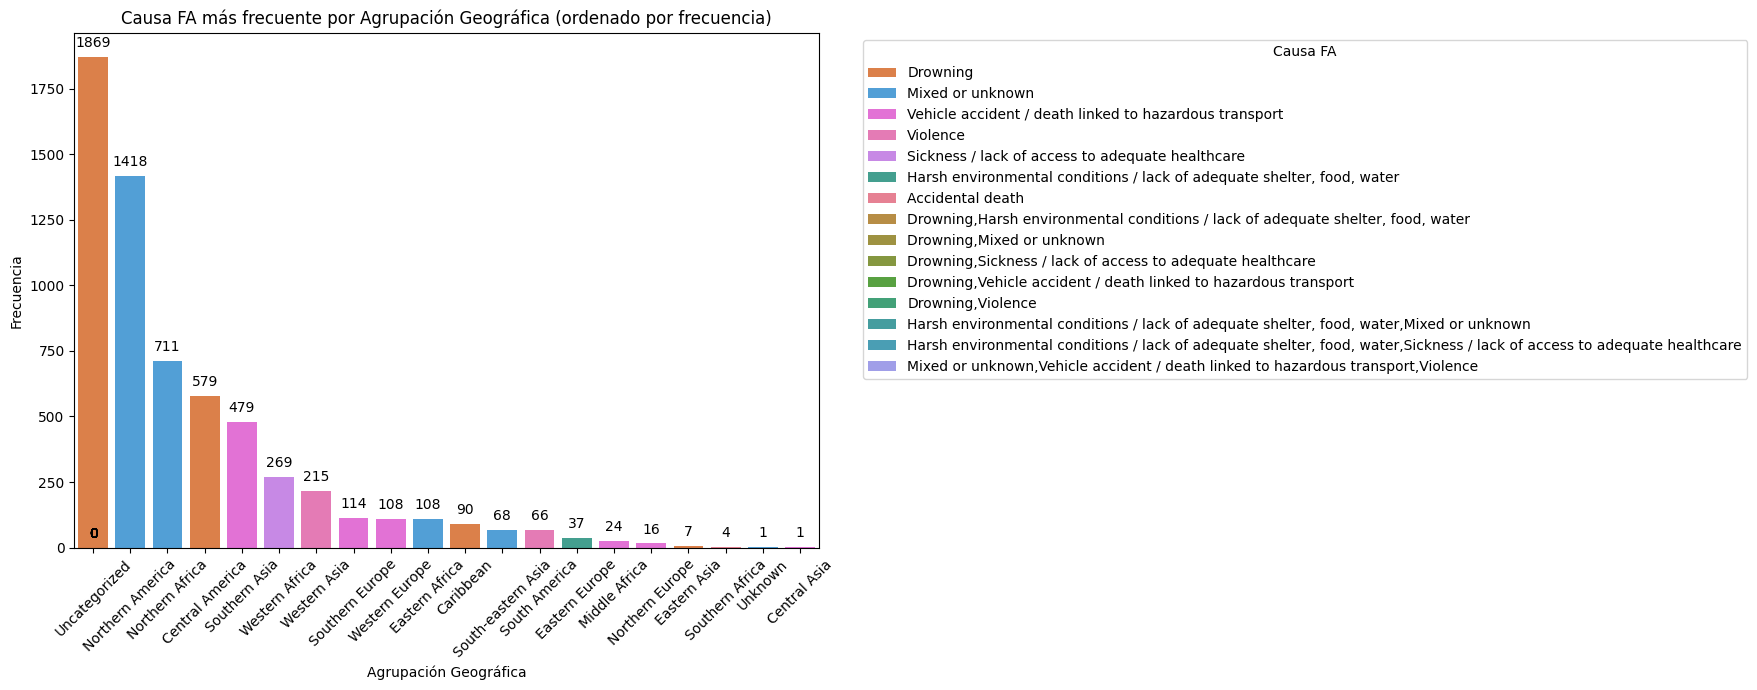

In [385]:
# Definir el orden de las categorías geográficas basado en la frecuencia
orden_geografico = max_frecuencias['Agr Geográfica']


plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Agr Geográfica', y='Frecuencia', hue='Causa FA', data=max_frecuencias, order=orden_geografico, dodge=False)

# Añadir etiquetas de frecuencia
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')



# Ajustar el orden de la leyenda para que coincida con las barras ordenadas
handles, labels = ax.get_legend_handles_labels()
frecuencias_causa = max_frecuencias.groupby('Causa FA')['Frecuencia'].sum().sort_values(ascending=False)
labels_ordenadas = [label for label in frecuencias_causa.index if label in labels]
handles_ordenadas = [handles[labels.index(label)] for label in labels_ordenadas]
ax.legend(handles=handles_ordenadas, labels=labels_ordenadas, title='Causa FA', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('Causa FA más frecuente por Agrupación Geográfica (ordenado por frecuencia)')
plt.xlabel('Agrupación Geográfica')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### <span style="color:orange">1era Hipótesis : En la región de Norteamérica, debe ser mayor el nro de hombres que el nro de mujeres <span>

In [386]:
df_norteamerica = df[df['Región Incidente']=='North America']
df_norteamerica.head(5)

Tipo Incidente  Año Incidente  Mes Reportado  \
0               1           2014              1   
1               1           2014              1   
2               1           2014              1   
3               1           2014              1   
5               1           2014              1   

                   Región Origen Región Incidente País Origen  Nro FA  \
0                Central America    North America   Guatemala       1   
1  Latin America / Caribbean (P)    North America     Unknown       1   
2  Latin America / Caribbean (P)    North America     Unknown       1   
3                Central America    North America      Mexico       1   
5  Latin America / Caribbean (P)    North America     Unknown       1   

   Mín Estimado DES  Nro Total FAyDES  Nro SOBInc  Nro Mujeres  Nro Hombres  \
0                 0                 1           0            0            1   
1                 0                 1           0            0            0   
2                 0                 1           0            0            0   
3                 0                 1           0            0            1   
5                 0                 1           0            0            0   

   Nro Niños          Causa FA  \
0          0  Mixed or unknown   
1          0  Mixed or unknown   
2          0  Mixed or unknown   
3          0          Violence   
5          0          Violence   

                                        Ubicación FA  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
5  Pima Country Office of the Medical Examiner ju...   

                                     Fte Información             Coordenadas  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
5  Pima County Office of the Medical Examiner (PC...    32.45435, -113.18402   

     Agr Geográfica  
0  Northern America  
1  Northern America  
2  Northern America  
3  Northern America  
5  Northern America

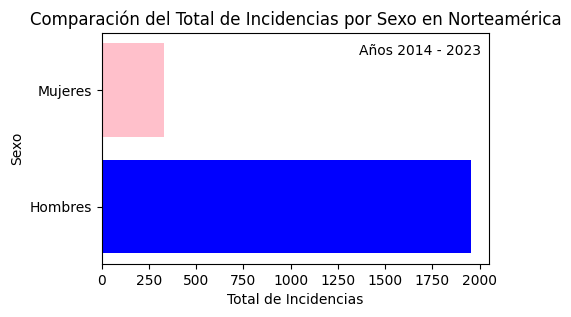

In [387]:
categorias = ['Hombres', 'Mujeres']
tot_incidencias = [df_norteamerica["Nro Hombres"].sum(), df_norteamerica["Nro Mujeres"].sum()]

# Ahora, calculamos los años de inicio y fin
año_inicio = df_norteamerica['Año Incidente'].min()
año_fin = df_norteamerica['Año Incidente'].max()

# Creamos el gráfico de barras horizontales
plt.figure(figsize=(5, 3))

# Agregamos la etiqueta para indicar el rango de años en la parte superior derecha
plt.text(0.98, 0.95, f"Años {año_inicio} - {año_fin}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=10)

plt.barh(categorias, tot_incidencias, color=['blue', 'pink'])

# Añadimos etiquetas y título
plt.xlabel('Total de Incidencias')
plt.ylabel('Sexo')
plt.title('Comparación del Total de Incidencias por Sexo en Norteamérica')

# Mostramos el gráfico
plt.show()


A través del gráfico se comprueba la hipótesis Nro 1. El total de Hombres es superior al total de mujeres en Norteamérica (por incidencias)

### <span style="color:orange">2da Hipótesis : Para el año 2020, la región de Geográfica de América del Norte podría tener el mayor nro de casos de muertos y desaparecidos.<span>

In [388]:
# Creamos un DataFrame con las variables a estudiar, agrupadas por Zona, Año y totalizada por muertos y desaparecidos
incidentes_x_zona = df.groupby( ['Agr Geográfica','Año Incidente'] )['Nro Total FAyDES'].sum().reset_index()

In [389]:
# Eliminamos la grupo-zona Uncategorized y N/A
incidentes_x_zona = incidentes_x_zona.loc[ (incidentes_x_zona['Agr Geográfica'] != 'Uncategorized') & (incidentes_x_zona['Agr Geográfica'] != 'N/A')]

In [390]:
# Filtramos por año 2020
incidentes_x_zona_2020 = incidentes_x_zona[incidentes_x_zona['Año Incidente'] == 2020]
incidentes_x_zona_2020

Agr Geográfica  Año Incidente  Nro Total FAyDES
6             Caribbean           2020               143
16      Central America           2020               160
26         Central Asia           2020                 0
36       Eastern Africa           2020                74
46         Eastern Asia           2020                 2
56       Eastern Europe           2020                 9
66        Middle Africa           2020                19
76      Northern Africa           2020               125
86     Northern America           2020               365
96      Northern Europe           2020                 0
106       South America           2020                65
116  South-eastern Asia           2020                35
126     Southern Africa           2020                 0
136       Southern Asia           2020               128
146     Southern Europe           2020                62
166             Unknown           2020                 0
176      Western Africa           2020                55
186        Western Asia           2020                64
196      Western Europe           2020                14

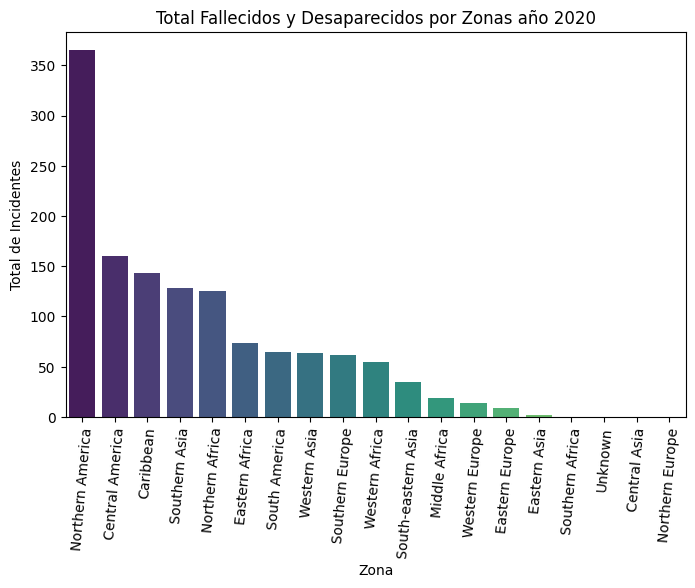

In [391]:
# Graficamos
 
plt.figure(figsize=(8, 5))
orden = incidentes_x_zona_2020.sort_values('Nro Total FAyDES', ascending=False)['Agr Geográfica']
sns.barplot(x='Agr Geográfica', y='Nro Total FAyDES', data=incidentes_x_zona_2020, order=orden, palette='viridis')
plt.title('Total Fallecidos y Desaparecidos por Zonas año 2020')
plt.xlabel('Zona')
plt.ylabel('Total de Incidentes')
plt.xticks(rotation=85)

plt.show()

Para el año 2020 se cumple la hipótesis nro 2, pero no necesariamente se podría cumplir para otros años.

### <span style="color:orange">Gráfico GeoEspacial<span>

In [392]:
#Separamos coordenadas en Latitud y Longitud
df[['Latitud', 'Longitud']] = df['Coordenadas'].str.split(',', expand=True).astype(float)

In [393]:
df.head(2)

Tipo Incidente  Año Incidente  Mes Reportado  \
0               1           2014              1   
1               1           2014              1   

                   Región Origen Región Incidente País Origen  Nro FA  \
0                Central America    North America   Guatemala       1   
1  Latin America / Caribbean (P)    North America     Unknown       1   

   Mín Estimado DES  Nro Total FAyDES  Nro SOBInc  Nro Mujeres  Nro Hombres  \
0                 0                 1           0            0            1   
1                 0                 1           0            0            0   

   Nro Niños          Causa FA  \
0          0  Mixed or unknown   
1          0  Mixed or unknown   

                                        Ubicación FA  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   

                                     Fte Información             Coordenadas  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   

     Agr Geográfica    Latitud    Longitud  
0  Northern America  31.650259 -110.366453  
1  Northern America  31.597130 -111.737560

In [394]:
df = df.drop("Coordenadas", axis=1)  # Elimina columna 

In [395]:
import folium
from folium.plugins import MarkerCluster
import math

In [396]:
#Incializa en cierta posición
map1 = folium.Map(location=[26.0198, 32.2778], tiles='cartodbpositron', zoom_start=3, control_scale=True ) 


mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['Longitud']) and not math.isnan(row['Latitud']):
        mc.add_child(folium.Marker([row['Latitud'], row['Longitud']]))
map1.add_child(mc)
map1

### <span style="color:orange">Transformación de Box-Cox (corrección de asimetrías)<span>

La corrección de asimetrías en variables numéricas es una técnica importante en la preparación de datos para el análisis estadístico y el modelado de machine learning. Una de las técnicas más comunes para corregir la asimetría (o sesgo) es la transformación logarítmica. Esta técnica se utiliza para reducir la asimetría de una distribución, haciendo que sea más parecida a una distribución normal.


In [397]:
df.dtypes

Tipo Incidente         int64
Año Incidente          int64
Mes Reportado          int64
Región Origen       category
Región Incidente    category
País Origen         category
Nro FA                 int64
Mín Estimado DES       int64
Nro Total FAyDES       int64
Nro SOBInc             int64
Nro Mujeres            int64
Nro Hombres            int64
Nro Niños              int64
Causa FA            category
Ubicación FA        category
Fte Información     category
Agr Geográfica      category
Latitud              float64
Longitud             float64
dtype: object

In [398]:
# Generamos nuevo dataframe con solo variables numéricas
df_int   = df.select_dtypes(include=['int64'])
df_int.columns

Index(['Tipo Incidente', 'Año Incidente', 'Mes Reportado', 'Nro FA',
       'Mín Estimado DES', 'Nro Total FAyDES', 'Nro SOBInc', 'Nro Mujeres',
       'Nro Hombres', 'Nro Niños'],
      dtype='object')

In [399]:
# Generamos nuevo dataframe (df_ln) con el logaritimo de cada columna
ListCols_ln =[]
df_ln = pd.DataFrame()
for col in (df_int.columns):
    new_col= 'ln_'+col
    df_ln[new_col] = np.log(df[col]+1).astype('int64')

df_ln.columns

Index(['ln_Tipo Incidente', 'ln_Año Incidente', 'ln_Mes Reportado',
       'ln_Nro FA', 'ln_Mín Estimado DES', 'ln_Nro Total FAyDES',
       'ln_Nro SOBInc', 'ln_Nro Mujeres', 'ln_Nro Hombres', 'ln_Nro Niños'],
      dtype='object')

In [400]:
# Definimos una función para graficar la Distribución de las variables numéricas
def Fn_Distribucion(Nrows, Ncols, Data, ListaColumnas, NameDf) :

    fig, axes = plt.subplots(nrows=Nrows, ncols=Ncols, figsize=(10, 6))
    axes = axes.flat

    for i, colum in enumerate(ListaColumnas):
        sns.kdeplot(
            data     = Data,
            x        = colum,
            fill    = True,
            color   = "blue",
            ax      = axes[i]
        )
        sns.rugplot(
            data     = Data,
            x        = colum,
            color   = "blue",
            ax      = axes[i]
        )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


    fig.tight_layout()
    plt.subplots_adjust(top = 0.9)
    fig.suptitle('Distribución variables numéricas en : '+NameDf, fontsize = 10, fontweight = "bold");

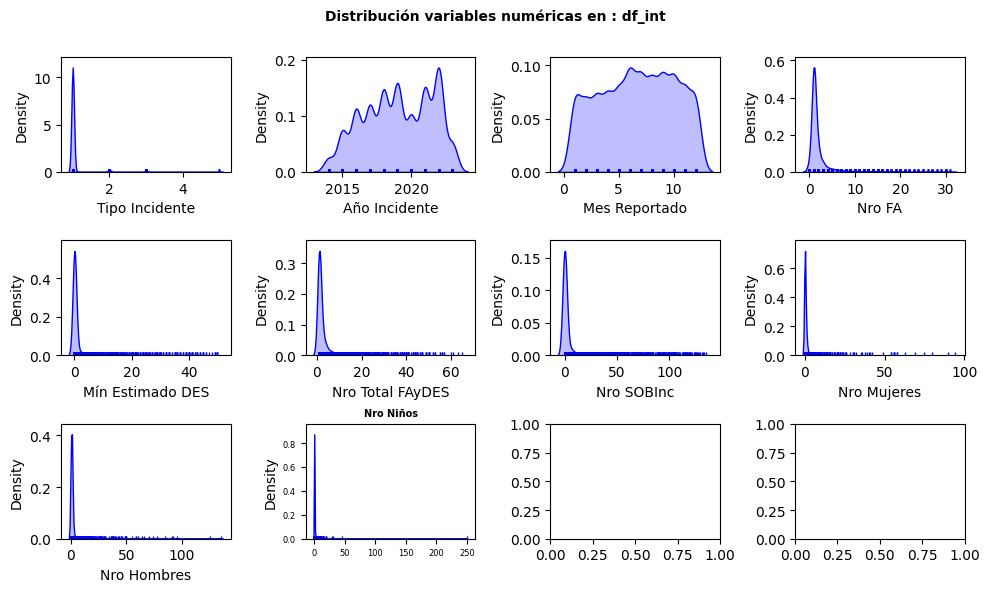

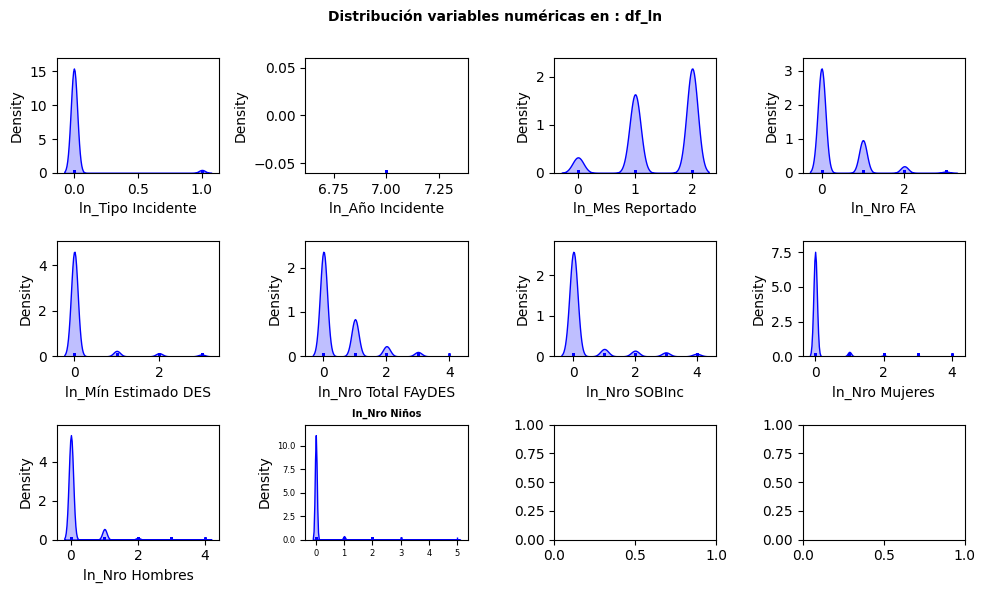

In [401]:
# Graficamos ambos Dataframes y comparamos las distribuciones resultantes
Fn_Distribucion(3, 4, df_int, df_int.columns.tolist(), 'df_int' )
Fn_Distribucion(3, 4, df_ln, df_ln.columns.tolist(), 'df_ln' )


#### Conclusión: Vemos que cambia la escala pero no mucho la distribución, por lo tanto, se decarta seguir usando el Dataframe : df_ln
No se aplicará modificación de asimetrías.


### <span style="color:orange">Selección de Características II (feature selection)<span>

Los filtros se utilizan para elegir un subconjunto de variables relevantes eliminando las que generan ruido antes de correr los modelos.

### Inutilidad

Este criterio consiste en descartar las variables muy concentradas dentro de los datos, las que tiene variabilidad 0 o muy cercana 0.
Esto puede ser útil para mejorar la eficacia de los modelos de ML y reducir el tiempo de entrenamiento al eliminar información redundante.

In [402]:
df_int.std()

Tipo Incidente       0.231037
Año Incidente        2.431388
Mes Reportado        3.350849
Nro FA               3.199170
Mín Estimado DES     4.319398
Nro Total FAyDES     5.600199
Nro SOBInc          13.810565
Nro Mujeres          2.924550
Nro Hombres          3.906836
Nro Niños            2.478167
dtype: float64

### Se observa un atributo con una desviación estándar muy pequeña (0 - 0.2), por lo tanto, eliminamos el atributo: Tipo Incidente


In [403]:
df_int.drop(columns=["Tipo Incidente"], inplace=True)

In [404]:
df_int.corr().style.format(precision=2)

### <span style="color:orange">Matriz de Correlación<span>

<Axes: >

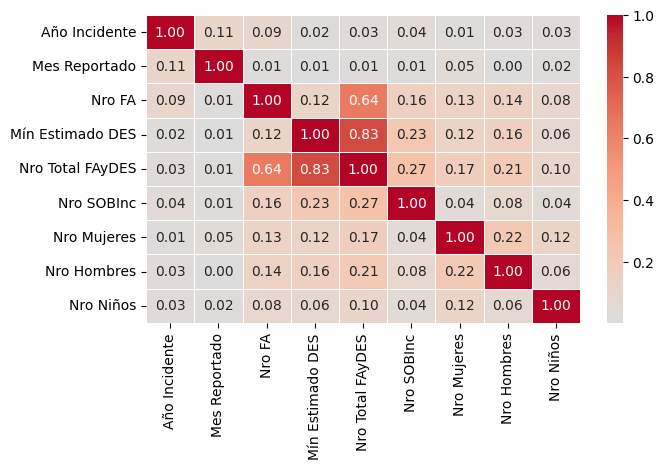

In [405]:
corr_mat = df_int.corr(method='pearson').abs()
f, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr_mat, annot=True,fmt=".2f", linewidth=.5, cmap='coolwarm', center=0)

In [406]:
print('Las 5 columnas más correlacionadas positivamente con: Nro Total FAyDES')
corr_mat['Nro Total FAyDES'].sort_values(ascending=False).head(5).round(2)

Las 5 columnas más correlacionadas positivamente con: Nro Total FAyDES


Nro Total FAyDES    1.00
Mín Estimado DES    0.83
Nro FA              0.64
Nro SOBInc          0.27
Nro Hombres         0.21
Name: Nro Total FAyDES, dtype: float64

No se distingue 2 o más variables muy correlacionadas, con "Nro Total FAyDES", como para eliminar alguna de ellas. 

Tenemos 0.63 y 0.83 (no son muy cercanos estos valores)

Por lo tanto, nos quedamos con todas las variables numéricas sin eliminar ninguna de ellas.

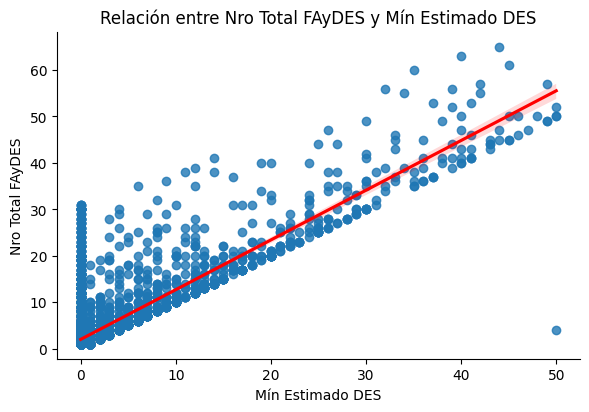

In [416]:
sns.lmplot(data=df, x='Mín Estimado DES', y='Nro Total FAyDES', line_kws={'color': 'r'}, height=4, aspect=1.5)
plt.title('Relación entre Nro Total FAyDES y Mín Estimado DES')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

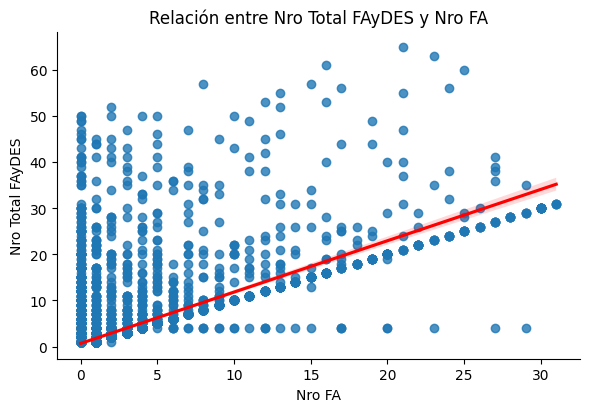

In [408]:
sns.lmplot(data=df, x='Nro FA', y='Nro Total FAyDES', line_kws={'color': 'r'}, height=4, aspect=1.5)
plt.title('Relación entre Nro Total FAyDES y Nro FA')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

<Axes: xlabel='Mín Estimado DES', ylabel='Nro Total FAyDES'>

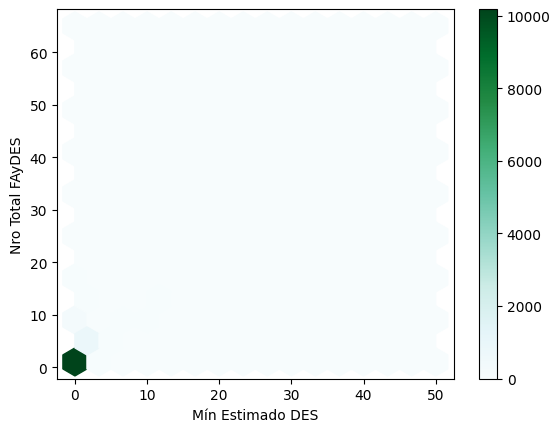

In [409]:
df.plot.hexbin(x='Mín Estimado DES', y='Nro Total FAyDES', gridsize=15)

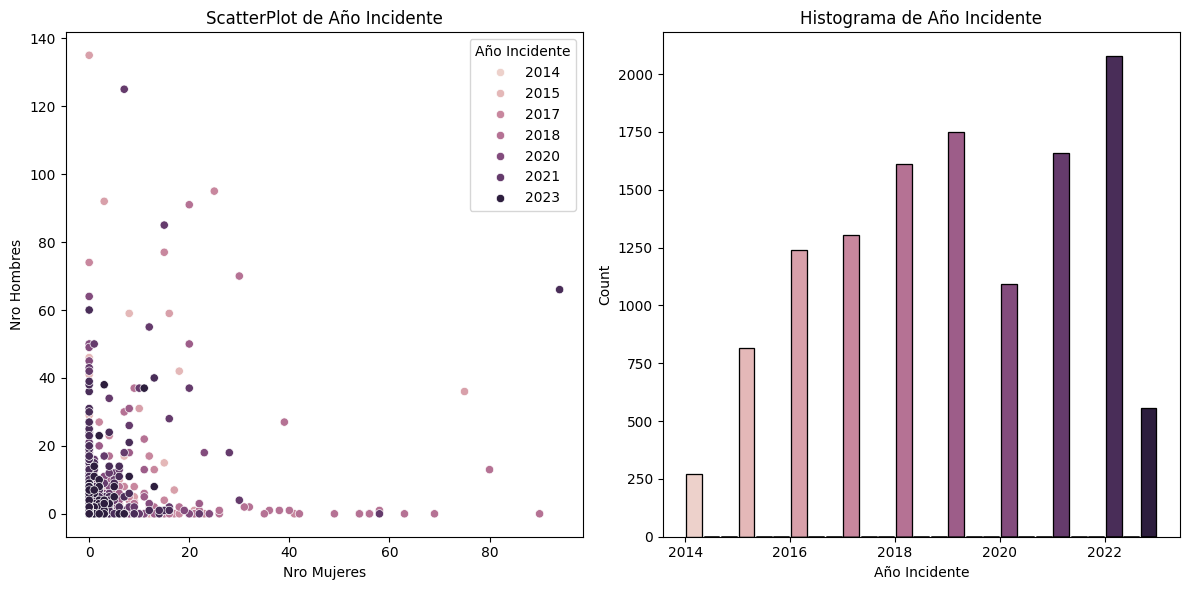

In [410]:
f, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=df, x="Nro Mujeres", y="Nro Hombres", hue="Año Incidente", ax=axs[0])
sns.histplot(data=df, x="Año Incidente", hue="Año Incidente", shrink=.9, alpha=1, legend=False, ax=axs[1])

# Añadir títulos y ajustar el layout
axs[0].set_title('ScatterPlot de Año Incidente')
axs[1].set_title('Histograma de Año Incidente')
plt.tight_layout()
#f.tight_layout()
plt.show()

### Escalado de los datos

### Normalización de los datos

Regresión y Matriz de confusión

### Cross Validation (hasta 5)  KFold y LOOCV

### GreedSearchCV

#### HalvingGreedSearchCV VER ultima clase